In [71]:
# The fail of SVB bank shows when a financial institution doesn't manage its assets  
# and liabilities well, negative consequences will occur. Below is an example of how 
# to utilize duration techniques to manage a financial institution's assets & liabilities 
# so that when there is a big swing in interest rate, it won't cause a bank failure. 


In [72]:
# For most banks customers prefer long-term loans (mortgage for example) and
# short-term deposits. Reason is long-term loans can lock in interest rate and short-term deposits 
# are more flexible when they need funds. There is a mismatch between bank's asset (long-term)
# and liabilities(short-term). However, when interest rate arise, this issue get worse as
# banks have to increase their deposit rates while long-term loan rates are fixed, which reduces 
# Net Interest Margin (NIM), or even cause liquidity problem.
# This duration mismatch is one of the reasons caused SVB failure. 

In [1]:
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [2]:
import os
cwd = os.getcwd()
os.chdir("H:\\interest_rate_risk")

In [3]:
# Duration measures the sensitivity of percentage changes in bond's price to changes in its yield:

$ duration: D= \large\frac{-1}{B} \frac{\Delta B}{\Delta y} =\large\frac{-1}{B}\frac{dB}{dy}$ .    ( B is bond price, y is interet rate)

In [4]:
# we know that when interest rate goes up, bond price goes down, vice versa.

In [5]:
# when interest rate moves dramatically, we need second order derivative.
# convexity: 

$\large C=\frac{1}{B} \frac{d^2B}{dy^2}$

In [6]:
# from Talyor series, we know:

$\Delta B=\frac{dB}{dy}\Delta y + 1/2* \frac{d^2 B}{d y^2} (\Delta y)^2 $

In [7]:
# divide by B, we get:

$\frac{\Delta B}{B}=-D\Delta y + 1/2* C (\Delta y)^2 $

In [8]:
# note that the duration D of a portlofio is the weighted average of the durations of the individual
# assets with the weight assigned to an asset being proportional to the value of the asset.

$ \large D= \sum\limits_{i=1}^{n}\frac{X_i}{P}D_i $

In [9]:
# D(i) is the duration of the ith asset/liability, X(i) is the value of ith asset/liability;

In [10]:
# definition of portfolio immunization:
#A portfolio consisting of long and short positions in interest-rate-dependent assets 
#can be protected against relatively small parallel shifts in the yield curve by ensuring 
#that its duration is zero. It can be protected against large parallel shifts in the yield
#curve by ensuring its duration and convexity are both zero or close to zero. 

In [11]:
# however, there is a requirement that the yield curve must be flat for such immunization strategy 
# to work well. But the yield curve isn't always flat (long-term and short-term interest rate don't
# change at same level). So we need to use partial duration, meaning rate for each term changes
# differently.

In [12]:
# assume we have a bank whose deposit and loan are as follows, notice that it has more long-term
# loans and short-term deposits. 

In [172]:
loan_deposit01=pd.read_excel("H:\\interest_rate_risk\\loan_deposit01.ods",engine='odf')

In [173]:
loan_deposit01

,term(year),loan_balance_MM,deposit_balance_MM,loan_interest_rate(%),deposit_interest_rate(%)
0,1,100,300,2.0,0.5
1,2,110,600,2.5,1.0
2,3,120,400,2.7,1.5
3,4,200,300,3.0,1.8
4,5,170,50,3.5,2.0
5,7,400,40,5.0,2.5
6,10,700,60,8.0,3.0
7,30,1200,50,12.0,5.0


In [174]:
# we can calculate its "partial duration" for each term as follows (only shows how to get duration
# for term=1Y as an example)

In [175]:
# 1. assume increasing 1 year loan interest rate and deposit rate by 0.5%, so they are 2.5% and 1%.
# 2. all other interest rates stay the same.
# 3. partial D of the portfolio equals the weighted average of the partial durations of the 
#    individual assets (liability).
# 4. for loan D= -1/B* [(change of B)/(change of y interest rate)]=-1/1282.92*[(1282.44-1282.92)/(0.005)]
#    =0.075; 
# 5. similarly for deposit D=1/1683.7*[(1682.22-1683.7)/(0.005)]=-0.176
# 6. partial D of the portfolio is [1283*0.075+1684*(-0.176)]/(1283+1684)=-0.067
# 7. similarly, we can calculate partial D for 2,3,4,...30 years.

In [176]:
df = pd.DataFrame([[-0.067,-0.319,-0.267,-0.134,0.154,0.541,0.824,0.22]], 
     index=['partial_duration'],columns =['Y1','Y2','Y3','Y4','Y5','Y7','Y10','Y30'])

In [177]:
print(df)

                     Y1     Y2     Y3     Y4     Y5     Y7    Y10   Y30
partial_duration -0.067 -0.319 -0.267 -0.134  0.154  0.541  0.824  0.22


In [178]:
# we can see that this fictitious bank's interest rate sensitivity is different, 
# 10 year rate is more sensitive than 30 year rate or 1 year rate. 

In [179]:
# this means when the yield curve changes differently, the bank's assets & liabilities will behave
# differently. 

In [180]:
# for example, if the interest rate of all term increase by 1e (e is a small number), 
# then the duration(D) of portfolio is 0.95e;
# if the 7,10,30 year rate increase by 1e, the D of portfolio becomes 0.541+0.824+0.22=1.59e;
# if 1,2,3 year rate increse by 1e, then D is -0.65e;
# if only 4,5 year rate increase by 1e, then D is 0.02e, almost no impact to the portfolio.

In [181]:
# however, when rates changed tremendously for every term, we need to use convexity and there will be
# a lot of cross-terms. And it is difficult to see which rates impact bank portfolio most.
# in that case, we can use PCA technique.

In [182]:
np.set_printoptions(precision=3)

#without using scientific number in numpy;
np.set_printoptions(suppress=True)

In [183]:
data01=pd.read_excel("H:\\interest_rate_risk\\rate_data.ods",engine="odf")

In [184]:
# below is the data of interest rate from 2000 to 2011, total of 2,780 obs.
# rate is 1y, 2y, 3y, ... , 30y rate (in %).

In [185]:
data01.head()

,1year,2year,3year,4year,5year,7year,10year,30year
0,7.10,7.16,7.17,7.17,7.17,7.20,7.24,7.24
1,7.03,7.06,7.07,7.07,7.08,7.11,7.14,7.16
2,7.07,7.13,7.14,7.15,7.16,7.19,7.21,7.21
3,7.01,7.04,7.06,7.06,7.07,7.10,7.14,7.14
4,7.04,7.09,7.11,7.13,7.14,7.17,7.20,7.19


In [186]:
# get YoY rate diff
data02=data01-data01.shift()

In [187]:
# get YoY rate in percentage
data03=100*data02.loc[1:,:]
print(data03.head())
print(data03.shape)

   1year  2year  3year  4year  5year  7year  10year  30year
1   -7.0  -10.0  -10.0  -10.0   -9.0   -9.0   -10.0    -8.0
2    4.0    7.0    7.0    8.0    8.0    8.0     7.0     5.0
3   -6.0   -9.0   -8.0   -9.0   -9.0   -9.0    -7.0    -7.0
4    3.0    5.0    5.0    7.0    7.0    7.0     6.0     5.0
5    0.0    1.0    0.0    0.0    0.0    1.0     2.0     1.0
(2779, 8)


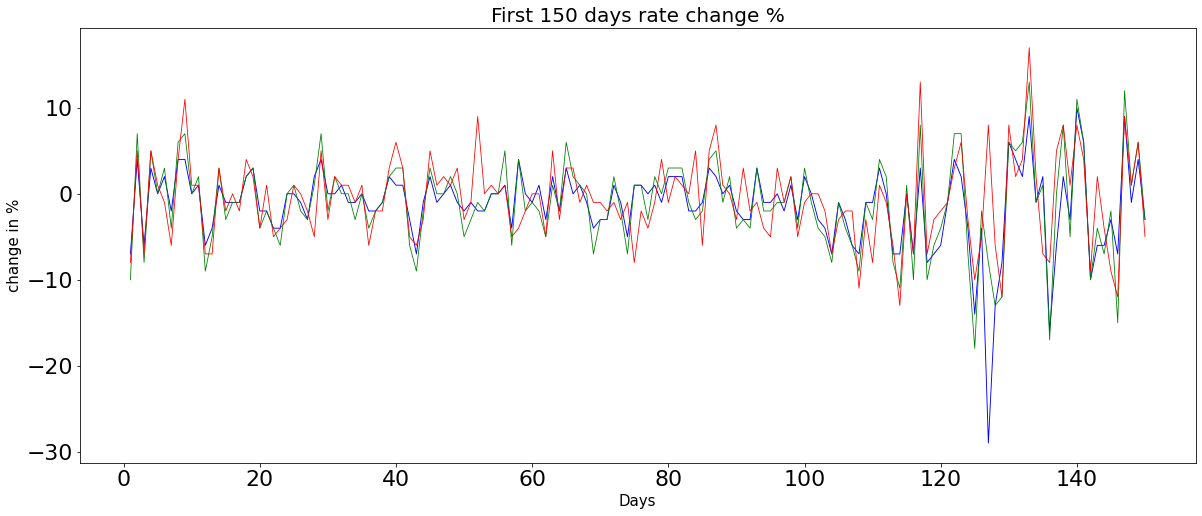

In [214]:
plt.plot([i for i in range(1,151)], data03.loc[0:150,'1year'].to_list(),c='blue',linewidth=0.9)
plt.plot([i for i in range(1,151)], data03.loc[0:150,'3year'].to_list(),c='green',linewidth=0.8)
plt.plot([i for i in range(1,151)], data03.loc[0:150,'30year'].to_list(),c='red',linewidth=0.8)
plt.rcParams["figure.figsize"] = (20,8)
plt.xlabel("Days", fontsize=15)
plt.ylabel("change in %", fontsize=15)
plt.rcParams.update({'font.size': 22})
plt.title('First 150 days rate change %',fontsize=20)
plt.show()
plt.close()

In [213]:
# seems interes rate changes up and down without much pattern.seems 3 Y and 30 Y are more correlated.

In [192]:
data04=data03.to_numpy()

In [193]:
data04[0:5,:]

array([[ -7., -10., -10., -10.,  -9.,  -9., -10.,  -8.],
       [  4.,   7.,   7.,   8.,   8.,   8.,   7.,   5.],
       [ -6.,  -9.,  -8.,  -9.,  -9.,  -9.,  -7.,  -7.],
       [  3.,   5.,   5.,   7.,   7.,   7.,   6.,   5.],
       [  0.,   1.,   0.,   0.,   0.,   1.,   2.,   1.]])

In [194]:
# transpose data to "wide" format, each col is an observation;

In [195]:
data05=data04.T
print(data05.shape)
print("           ")
print(data05)

(8, 2779)
           
[[ -7.   4.  -6. ...  -3.   5.  -1.]
 [-10.   7.  -9. ... -12.   4.  -2.]
 [-10.   7.  -8. ... -21.   4.  -3.]
 ...
 [ -9.   8.  -9. ... -26.   3.  -1.]
 [-10.   7.  -7. ... -23.   1.   4.]
 [ -8.   5.  -7. ... -16.   1.   9.]]


In [196]:
# get mean-deviation form:

In [197]:
mean_matrix=np.tile(np.mean(data05,axis=1).reshape(data05.shape[0],1),(1,data05.shape[1]))

In [198]:
data06=data05-mean_matrix

In [199]:
data06.shape

(8, 2779)

In [200]:
# calculate the covariance matrix 

In [201]:
cov_matrix=np.dot(data06,data06.T)/(data06.shape[1]-1)

In [202]:
cov_matrix[0:3,:]

array([[22.159, 26.811, 27.039, 26.486, 25.916, 23.694, 21.091, 15.214],
       [26.811, 38.487, 40.555, 40.798, 40.642, 38.003, 34.664, 26.172],
       [27.039, 40.555, 44.896, 45.826, 46.203, 43.901, 40.627, 31.46 ]])

In [203]:
#eigenvalues:
eig_value=la.eig(cov_matrix)[0]
print(eig_value)

[308.244+0.j  22.751+0.j   4.318+0.j   1.669+0.j   0.835+0.j   0.537+0.j
   0.279+0.j   0.309+0.j]


In [204]:
#eigenvectors:
eig_vector=la.eig(cov_matrix)[1]
print(eig_vector)

[[ 0.216 -0.501 -0.627 -0.487 -0.122  0.237  0.034  0.011]
 [ 0.331 -0.429 -0.129  0.354  0.212 -0.674 -0.236 -0.1  ]
 [ 0.372 -0.267  0.157  0.414  0.096  0.311  0.564  0.413]
 [ 0.392 -0.11   0.256  0.174  0.019  0.551 -0.512 -0.416]
 [ 0.404  0.019  0.355 -0.269 -0.595 -0.278  0.327 -0.316]
 [ 0.394  0.194  0.195 -0.336 -0.007 -0.1   -0.422  0.685]
 [ 0.376  0.371 -0.068 -0.305  0.684 -0.039  0.279 -0.278]
 [ 0.305  0.554 -0.575  0.398 -0.331  0.022 -0.032  0.007]]


In [205]:
# we can see that the first factor, corresponds to a roughly parallel shift in the yield curve. where
# we have one-year rate increase by 0.216 basis points, two-year rate increases by 0.331 basis point, 
# and so on. 
# the second factor shows that rates between year 1 and year 4 decreased while year 5 to year 30
# increased.

In [206]:
# the first 2 factors already explained 97.7% of the variance in the data.

round(float(sum(eig_value[0:2])/sum(eig_value)),3)

C:\Users\thesu\AppData\Local\Temp\ipykernel_18660\2412938883.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  round(float(sum(eig_value[0:2])/sum(eig_value)),3)


0.977

In [207]:
# deriving new data coordinates
# final data=row_feature_vector * row_zero_mean_data_transposed

In [208]:
# pick up first two factors:
eig_vector_keep=eig_vector[:,0:2]

In [209]:
final_data=np.dot(eig_vector_keep.T, data06)

In [210]:
final_data[:,0:6]

array([[-25.25 ,  20.03 , -22.136,  16.844,   2.36 ,   5.642],
       [  1.378,  -0.814,   1.471,   0.605,   0.932,  -2.748]])

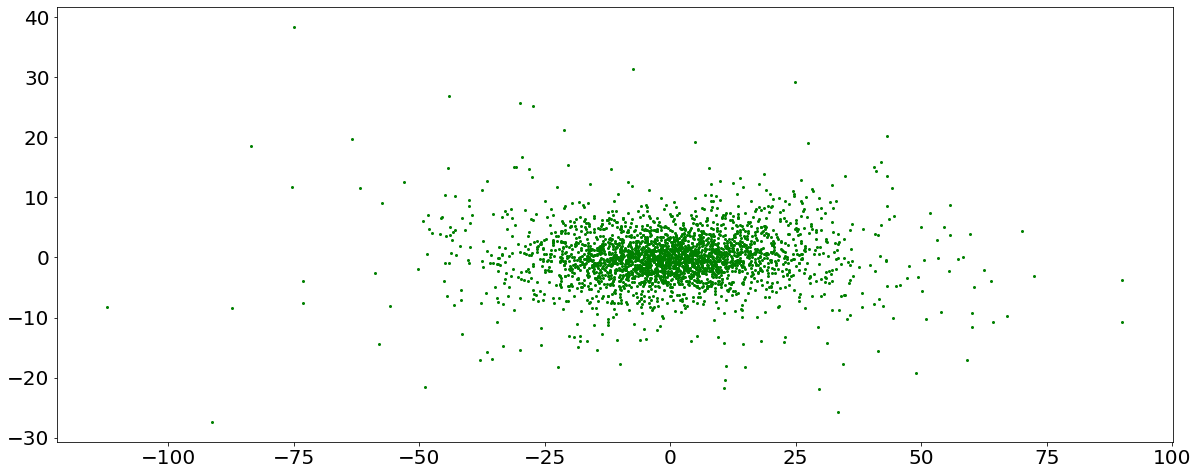

In [211]:
plt.scatter(final_data[0], final_data[1],s=4,c='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.show()